So we are starting with the bigram model first

Using Gemini to collect all the topics in one place 
To implement the bigram models from Andrej Karpathy's lectures, you can follow these steps. This outline combines the key concepts from the video with the code you've provided, creating a clear implementation path.

***

### Part 1: Statistical Bigram Model

1.  **Prepare the Data**
    * Load the `names.txt` dataset and split it into a list of words.
    * Create a vocabulary of all unique characters in the dataset.
    * Establish a mapping from characters to integers (`stoi`) and integers to characters (`itos`), including a special `.` token for start and end characters. 
2.  **Count Bigrams**
    * Initialize a 27x27 PyTorch tensor, `N`, filled with zeros. This will serve as your bigram count table.
    * Iterate through each word in the dataset.
    * For each word, create a list of bigrams by prepending and appending the `.` token.
    * For each bigram, use the `stoi` mapping to get the integer indices for the two characters and increment the corresponding cell in the `N` tensor.
3.  **Analyze and Sample from the Model**
    * Visualize the `N` tensor using `matplotlib` to see the bigram frequencies.
    * Normalize the bigram counts to get probabilities. Create a new tensor `P` by converting `N` to a float, and then dividing each row by its sum. Use `N+1` before normalizing to implement **model smoothing**.
    * To generate new names, start with the `.` token. Use `torch.multinomial` on the probability distribution for the current character to sample the next character.
    * Repeat this process, appending the sampled character to an output list until a `.` is sampled.
4.  **Evaluate the Model**
    * Calculate the **negative log-likelihood (NLL)**.
    * Iterate through all bigrams in your training data.
    * For each bigram, get the probability from your `P` tensor.
    * Compute the log of this probability (`torch.log(prob)`).
    * Sum up all the log probabilities and then negate the sum to get the total log-likelihood.
    * The average NLL (total NLL divided by the number of bigrams) is your loss.

***

### Part 2: Neural Network Bigram Model

1.  **Prepare Neural Network Data**
    * Create a dataset of `(x, y)` pairs, where `x` is the index of the first character of a bigram and `y` is the index of the second.
    * Store these pairs in PyTorch tensors `xs` and `ys`.
2.  **Define and Train the Neural Network**
    * Initialize a `27x27` weight matrix `W` with random values. This matrix represents the "neural network." Set `requires_grad=True` to enable backpropagation.
    * Implement the training loop:
        * **Forward Pass**:
            * Convert the input `xs` into a one-hot encoded tensor `xenc` of shape `(num_examples, 27)`.
            * Compute the "logits" by performing a matrix multiplication: `logits = xenc @ W`.
            * Apply the softmax function to the logits to get probabilities: `counts = logits.exp()` and `probs = counts / counts.sum(1, keepdims=True)`.
            * Calculate the **loss**: Use the negative log-likelihood of the probabilities for the correct characters (`ys`). The code `loss = -probs[torch.arange(num), ys].log().mean()` is a vectorized way to do this. Add a regularization term like `0.01*(W**2).mean()` to prevent the model from becoming too confident (similar to model smoothing).
        * **Backward Pass**:
            * Call `loss.backward()` to compute the gradients of the loss with respect to the weight matrix `W`.
        * **Update Weights**:
            * Update the weights using a small learning rate multiplied by the gradients: `W.data += -learning_rate * W.grad`.
            * Repeat this loop for multiple epochs to train the model.
3.  **Sample from the Neural Network**
    * Start with the `.` token (index 0).
    * Create a one-hot encoded tensor for the current character's index.
    * Pass this tensor through the trained neural network (`xenc @ W`) and apply the softmax to get the probability distribution for the next character.
    * Use `torch.multinomial` to sample the next character's index from this distribution.
    * Repeat the process until the `.` token is sampled, then join the characters to form a name.

    ***

*** 
This is a GPT generated - slightly less assisted to-do list , will refer to the above when stuck and to the below for my main stuff
***
# Bigram Language Model & Neural Net Implementation — Step-by-Step Plan

This notebook will implement a bigram character model and then extend it to a small neural network, **from scratch**.  
The following steps are the roadmap to follow.

---

## **Part 1 — Bigram Model (Statistical Counting)**

1. **Read and Inspect the Dataset**
   - Load `names.txt` into a Python list of strings.
   - Print sample names, dataset size, min/max name length.

2. **Count Bigrams with a Python Dictionary**
   - Add start (`.`) and end (`.`) tokens around each word.
   - Count `(ch1, ch2)` pairs using a dictionary.

3. **Count Bigrams with a Torch Tensor**
   - Create mappings:
     - `stoi` — string to index
     - `itos` — index to string
   - Build a `27×27` count matrix `N` using tensor indexing.

4. **Visualize the Bigram Matrix**
   - Plot counts as an image with `matplotlib`.
   - Overlay `(ch1, ch2)` pairs and their counts.

5. **Normalize to Probabilities**
   - Convert counts to probabilities `P` by row-wise normalization.
   - Sample characters using `torch.multinomial`.

6. **Sampling from the Bigram Model**
   - Generate random names by repeatedly sampling until the end token.

7. **Loss Function (Negative Log Likelihood)**
   - Compute average negative log likelihood (NLL) of the dataset.
   - Understand relationship between NLL, log-likelihood, and cross-entropy.

8. **Model Smoothing**
   - Apply add-one (Laplace) smoothing to avoid zero probabilities.

---

## **Part 2 — Neural Network Bigram Model**

9. **Create Training Dataset**
   - For each bigram: store input index (`xs`) and target index (`ys`).

10. **One-Hot Encoding**
    - Convert `xs` into one-hot vectors of size 27.
    - Inspect shapes and visualize.

11. **Initialize Linear Layer Weights**
    - Randomly initialize `W` with shape `(27, 27)`.

12. **Forward Pass**
    - Compute logits: `xenc @ W`.
    - Apply softmax to get probabilities.

13. **Loss Computation**
    - Extract predicted probability for each correct target in `ys`.
    - Compute mean NLL loss.

14. **Vectorized Implementation**
    - Perform the loss computation for the entire batch without loops.

15. **Backward Pass and Update**
    - Zero gradients, call `.backward()`, update `W` with gradient descent.

16. **Regularization**
    - Add L2 penalty term (`0.01*(W**2).mean()`) to the loss.

17. **Train the Model**
    - Repeat forward–backward–update steps until loss converges.

18. **Sampling from the Neural Net**
    - Use the trained neural net to sample names.
    - Replace bigram table sampling with network predictions.

---




In [2]:
# let's code 
print("Hello")

Hello


In [3]:
words = open('names.txt' , 'r').read().splitlines()

In [4]:
# mess around with the data
print(words)

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn', 'abigail', 'emily', 'elizabeth', 'mila', 'ella', 'avery', 'sofia', 'camila', 'aria', 'scarlett', 'victoria', 'madison', 'luna', 'grace', 'chloe', 'penelope', 'layla', 'riley', 'zoey', 'nora', 'lily', 'eleanor', 'hannah', 'lillian', 'addison', 'aubrey', 'ellie', 'stella', 'natalie', 'zoe', 'leah', 'hazel', 'violet', 'aurora', 'savannah', 'audrey', 'brooklyn', 'bella', 'claire', 'skylar', 'lucy', 'paisley', 'everly', 'anna', 'caroline', 'nova', 'genesis', 'emilia', 'kennedy', 'samantha', 'maya', 'willow', 'kinsley', 'naomi', 'aaliyah', 'elena', 'sarah', 'ariana', 'allison', 'gabriella', 'alice', 'madelyn', 'cora', 'ruby', 'eva', 'serenity', 'autumn', 'adeline', 'hailey', 'gianna', 'valentina', 'isla', 'eliana', 'quinn', 'nevaeh', 'ivy', 'sadie', 'piper', 'lydia', 'alexa', 'josephine', 'emery', 'julia', 'delilah', 'arianna', 'vivian', 'kaylee', 'sophie', 'brielle', 'madeline', 'peyton', 'ryle

In [5]:
W = words[:5]
print(W) # use this for smaller sampling and intuitive understanding

['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [6]:
# Create our data

#bigrams
bigrams = []
for word in words:
    word = '.' + word + '.'
    for ch1 , ch2 in zip (word , word[1:]):
        bigrams.append(ch1+ch2)

print("bigrams are : ",bigrams)

bigrams are :  ['.e', 'em', 'mm', 'ma', 'a.', '.o', 'ol', 'li', 'iv', 'vi', 'ia', 'a.', '.a', 'av', 'va', 'a.', '.i', 'is', 'sa', 'ab', 'be', 'el', 'll', 'la', 'a.', '.s', 'so', 'op', 'ph', 'hi', 'ia', 'a.', '.c', 'ch', 'ha', 'ar', 'rl', 'lo', 'ot', 'tt', 'te', 'e.', '.m', 'mi', 'ia', 'a.', '.a', 'am', 'me', 'el', 'li', 'ia', 'a.', '.h', 'ha', 'ar', 'rp', 'pe', 'er', 'r.', '.e', 'ev', 've', 'el', 'ly', 'yn', 'n.', '.a', 'ab', 'bi', 'ig', 'ga', 'ai', 'il', 'l.', '.e', 'em', 'mi', 'il', 'ly', 'y.', '.e', 'el', 'li', 'iz', 'za', 'ab', 'be', 'et', 'th', 'h.', '.m', 'mi', 'il', 'la', 'a.', '.e', 'el', 'll', 'la', 'a.', '.a', 'av', 've', 'er', 'ry', 'y.', '.s', 'so', 'of', 'fi', 'ia', 'a.', '.c', 'ca', 'am', 'mi', 'il', 'la', 'a.', '.a', 'ar', 'ri', 'ia', 'a.', '.s', 'sc', 'ca', 'ar', 'rl', 'le', 'et', 'tt', 't.', '.v', 'vi', 'ic', 'ct', 'to', 'or', 'ri', 'ia', 'a.', '.m', 'ma', 'ad', 'di', 'is', 'so', 'on', 'n.', '.l', 'lu', 'un', 'na', 'a.', '.g', 'gr', 'ra', 'ac', 'ce', 'e.', '.c', 'ch', 

In [7]:
# character set
chars = set(''.join(words))
chars.add('.')
print("Our charset is : " , chars)

Our charset is :  {'.', 'v', 'q', 'p', 'l', 'd', 'j', 'r', 'f', 'o', 'h', 'i', 'y', 'n', 'b', 'w', 'm', 'k', 'z', 'c', 'a', 't', 'e', 's', 'g', 'x', 'u'}


In [8]:
# mapping -> 27 chars in a 27-D space
stoi , itos = {} , {}
sorted_chars = sorted(chars)
for index , char in enumerate(sorted_chars):
    stoi[char] =  index
    itos[index] =  char

print("stoi : " , stoi)
print("itos : " , itos)


stoi :  {'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
itos :  {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [9]:
# creating the count and prob matrix
import torch
import matplotlib.pyplot as plt


N = torch.zeros(27,27 , dtype = torch.int32)
print(N)

for bigram in bigrams:
    ch1 = bigram[0]
    ch2 = bigram[1]
    N[stoi[ch1]][stoi[ch2]] += 1

print("With counts : " , N)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


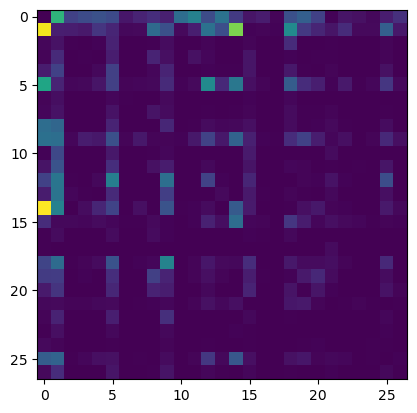

In [10]:
# plot it 
plt.imshow(N)

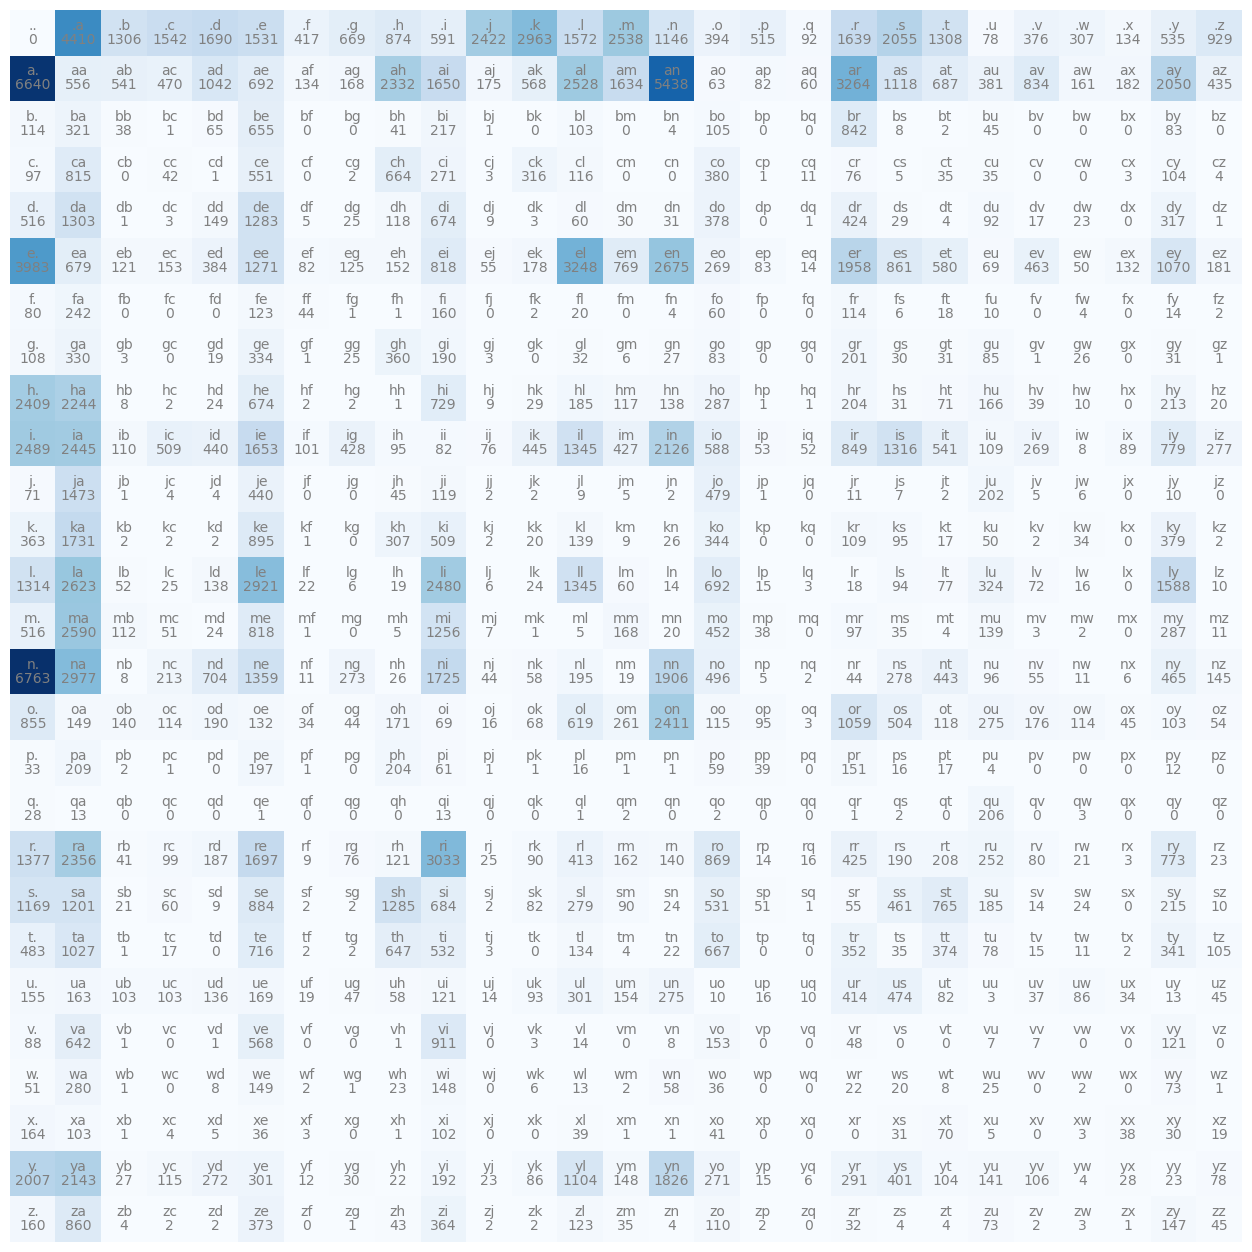

In [11]:
# better plot
get_ipython().run_line_magic('matplotlib', 'inline')

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [12]:
# now creating the prob 
# experiment first


print(N[0])
print(N[0]/N[0].sum())

# to do this on the whole matrix , we want to to sum along the rows , create a sum COLUMN VECTOR 
# and divide the main matrix by that ... thus we wanna sum along the rows (dim = 1)
# torch.sum(N , dim = 1 , keepdim = True) , this sums along the rows(dim 1) and preserves the 
# number of dimensions 
print(torch.sum(N , dim = 1).shape)
print(torch.sum(N , dim = 1,keepdim=True).shape)

eg = torch.tensor([[10,10,10] ,
                   [5,5,5],
                 [2,2,2]])
print(torch.sum(eg , dim = 1))
print(torch.sum(eg , dim = 1,keepdim=True))
print(eg / torch.sum(eg , dim = 1) , "\nhere it is  divided by \n[[30,15,6]\n,[30,15,6],\n[30,15,6]]\n\n")
print(eg / torch.sum(eg , dim = 1,keepdim = True) , "\nhere it is correctly divided by \n[[30,30,30],\n[15,15,15],\n[6,6,6]]")


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)
tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
torch.Size([27])
torch.Size([27, 1])
tensor([30, 15,  6])
tensor([[30],
        [15],
        [ 6]])
tensor([[0.3333, 0.6667, 1.6667],
        [0.1667, 0.3333, 0.8333],
        [0.0667, 0.1333, 0.3333]]) 
here it is  divided by 
[[30,15,6]
,[30,15,6],
[30,15,6]]


tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]]) 
here it is correctly divided by 
[[30,30,30],
[15,15,15],
[6,6,6]]


In [13]:
# now creating the prob 

N = N.float()
P = N/torch.sum(N , dim=1 , keepdim=True)
print(P)
# we however want to smoothen it out , coz in our data , some probabilites are zero
# and they may cause a loss of inf later on 
N = N+1
P = N/torch.sum(N , dim=1 , keepdim = True)
print("Probs with smoothening:\n",P)

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

<font size="3"> calculating the loss -  negative log likelihood
we define likelihood as a measure of how good our model is to predict the correct
next character of a bigram given the first one <br>
for every bigram in the dataset , ideally the likelihood should be one 
To measure this for all the entire training data , we multiply the probs of all bigrams sequences
we want this to approach 1<br>
we want its log to approach zero (at maxima) (it will be -ve)<br>
thus we want its negative log to approach zero (at minima)</font>

In [14]:
# calculating nll - negative log likelhood
sum_log = 0
num = 0
for bigram in bigrams :
    ch1 = bigram[0] 
    ch2 = bigram[1]
    sum_log += torch.log(P[stoi[ch1]][stoi[ch2]])
    num += 1
print(sum_log)
print("Average negative log likelihood = ",sum_log/num)

tensor(-559951.5625)
Average negative log likelihood =  tensor(-2.4544)


In [15]:
# Now we shall sample from this statistical model and also check loss of random words

def whatstheloss(word):
    nll = 0
    n = 0
    for ch1 , ch2 in zip(word , word[1:]):
        nll += -torch.log(P[stoi[ch1]][stoi[ch2]])
        n += 1
    return nll/n

names = ['andrej',"chris", "robert", "tony" , "samuel","captain" , "natasha", "rachit" , "parth" , "anushka" , "jyotshna" , "samir" , "sarthak" , "sedah" , "jenik" , "amay" , "ahmad" , "yashav", "dalol" , "divyanshu" , "yash","sian"]
# for name in names:
#     print(name , f'{whatstheloss(name).item():.3f}')

results = []
for name in names:
    loss_value = whatstheloss(name).item()
    results.append((loss_value, name)) # Store as (loss, name) tuple

# Sort the list. By default, it sorts by the first element, which is the loss.
results.sort()

# Print the sorted results
for loss, name in results:
    print(f"{name}: {loss:.3f}")

sian: 2.095
yash: 2.259
amay: 2.261
natasha: 2.315
tony: 2.331
chris: 2.332
yashav: 2.341
dalol: 2.399
samir: 2.413
jenik: 2.493
parth: 2.555
sedah: 2.578
sarthak: 2.638
rachit: 2.695
samuel: 2.714
ahmad: 2.819
divyanshu: 2.819
anushka: 2.904
robert: 2.915
captain: 3.065
andrej: 3.114
jyotshna: 3.727


In [16]:
# now we shall sample to create names from thus model
g = torch.Generator().manual_seed(2147483647)
for i in range (10):
    name = ""
    char = '.'
    while True:
        idx = torch.multinomial(P[stoi[char]] , num_samples = 1 , replacement = True,generator=g).item()
        ch = itos[idx]
        if ch == '.':
            break
        name += ch
        char = ch
    print(name)

junide
janasah
p
cony
a
nn
kohin
tolian
juee
ksahnaauranilevias


# NEURAL NET MODEL

<font size="3"> Now we train it on a neural net , which takes in a character as input and 
returns the probabilites for each character to follow it. <br>
Each character is encoded into a 27 dimensional space (very sparse space - 27 characters in a 27 dimensional space<br>
thus , the NN takes in a tx27 vector -> t 1x27char encoded vectors , and spits out a tx27 vector , i.e. t 1x27 vectors each containing the prob of each character coming next<br>
We will use a single layer NN with no bias for this use-case</font>

In [17]:
xs , ys = [],[]
for b in bigrams[:32]:
    xs.append(b[0])
    ys.append(b[1])
for i,j in zip(xs,ys):
    print(i,j)
    

. e
e m
m m
m a
a .
. o
o l
l i
i v
v i
i a
a .
. a
a v
v a
a .
. i
i s
s a
a b
b e
e l
l l
l a
a .
. s
s o
o p
p h
h i
i a
a .


In [18]:
xs = torch.tensor([stoi[i] for i in xs])
ys = torch.tensor([stoi[i] for i in ys])

In [19]:
print (xs , ys)

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9,
        19,  1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1]) tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])


In [20]:
# encode each of these values (values from 0 to 26 into a 27 dim space)
import torch.nn.functional as F
one_hot_enc = F.one_hot(xs, num_classes=27).float() # float coz of the operation we will do on it
print(one_hot_enc)
print(one_hot_enc.shape)


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0

In [21]:
W = torch.randn((27,27) , requires_grad = True,dtype = torch.float32)
print(W)
print(W.shape)

tensor([[ 0.9181,  0.5730, -1.4062, -1.1145,  0.5257,  1.1390,  0.3213,  0.8280,
         -0.3969, -0.2182,  0.5207, -1.1515, -1.2856, -1.7681, -1.1498,  0.0915,
         -0.2925,  0.2189, -1.1688, -0.7211,  0.9723, -1.3512,  0.2349, -0.2517,
         -0.1620,  0.0294, -0.9016],
        [ 0.4024,  0.2925, -1.6062, -0.7269,  0.0966, -0.0746, -0.1721, -1.8068,
          1.1571, -1.1113,  0.9651,  0.3614,  0.9260,  0.3813, -0.9461,  0.6758,
          0.1410,  1.0521, -0.6139, -1.1739, -0.2352,  1.1063, -0.5934,  0.1169,
          0.3085, -0.5585,  0.5904],
        [ 0.4212, -0.1113, -0.1427, -0.2608, -0.0816, -1.3461, -1.0723,  0.6149,
         -1.4436, -0.4151, -1.2404, -0.6317, -0.1592,  0.2215,  0.1460,  0.1691,
         -1.3244,  0.8966,  0.3322,  0.5908, -1.6428,  0.9074,  1.2925,  1.6866,
          1.2793, -1.4831,  0.8450],
        [ 0.8499, -0.5834,  1.6458, -1.5265,  0.1197,  0.1822, -0.8110,  0.6746,
         -0.0720, -0.6315,  1.7676, -1.8862,  0.6109,  1.0484,  0.5157, -0.3436

# now we shall do the forward pass

first we multiply the one_hot vector (inputs) with the weights matrix. 
these may be +ve or negative , so we must convert it to a probability format(positive numbers that sum to one)
thus the output isnt counts nor probabilitly , so we call these the log-counts , (i.e. they are analogous to the 
log of the counts of each bigram in the dataset)
now , we will take their exponent -> make them all positive
then we normalize them , i.e. divide by sum to get prob


In [22]:
# log-counts also called logits by convention
logits = one_hot_enc @ W
print("Initial out: logits -> " , logits)
logits = logits.exp()
print("taking exp -> " , logits)
probs = logits / logits.sum(1,keepdim = True)
print("prob : ",probs)

Initial out: logits ->  tensor([[ 0.9181,  0.5730, -1.4062, -1.1145,  0.5257,  1.1390,  0.3213,  0.8280,
         -0.3969, -0.2182,  0.5207, -1.1515, -1.2856, -1.7681, -1.1498,  0.0915,
         -0.2925,  0.2189, -1.1688, -0.7211,  0.9723, -1.3512,  0.2349, -0.2517,
         -0.1620,  0.0294, -0.9016],
        [-1.3145,  0.6867, -0.9495, -1.4725,  2.1696, -0.5743, -0.5818,  0.4772,
         -0.3358,  0.2831,  1.9475,  1.3003,  0.6407, -0.1298, -0.3945,  0.3103,
         -1.3907,  0.2382,  0.3084, -0.6342,  0.5987, -0.6038,  0.0536, -0.7379,
         -0.1119,  0.6737,  0.2209],
        [-1.6195,  1.1832, -1.0944, -0.4463,  0.3303, -1.4343,  0.6689, -0.5874,
          1.3516, -1.5604, -1.3560,  2.0851,  0.0083, -0.2561,  0.4607,  1.6512,
          0.4857,  0.0826, -0.3335,  0.6860, -1.5565, -0.6963,  0.7844,  1.3484,
          1.1124,  1.1233,  0.3622],
        [-1.6195,  1.1832, -1.0944, -0.4463,  0.3303, -1.4343,  0.6689, -0.5874,
          1.3516, -1.5604, -1.3560,  2.0851,  0.0083, -

In [23]:
# now all we gotta do is somehow find a W so that the probablitlites that come out in probs are pretty good
# loss function
output_idx = torch.arange(probs.shape[0])
print(output_idx)
y_probs = probs[output_idx , ys]
y_probs

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])


tensor([0.1089, 0.0203, 0.0157, 0.0663, 0.0433, 0.0382, 0.0480, 0.0271, 0.0234,
        0.0539, 0.0177, 0.0433, 0.0618, 0.0160, 0.1082, 0.0433, 0.0280, 0.1602,
        0.0208, 0.0058, 0.0070, 0.0438, 0.0466, 0.0645, 0.0433, 0.0169, 0.0559,
        0.0225, 0.0384, 0.0401, 0.0177, 0.0433], grad_fn=<IndexBackward0>)

In [24]:
# loss = nll/n
log_sum , n = 0,0
for p in y_probs:
    log_sum +=  -p.log()
    n += 1

print("nll = ",log_sum)
print("nll/n = ",log_sum/n)

nll =  tensor(108.0457, grad_fn=<AddBackward0>)
nll/n =  tensor(3.3764, grad_fn=<DivBackward0>)


In [25]:
-y_probs.log().mean()

tensor(3.3764, grad_fn=<NegBackward0>)

In [26]:
# workig example 
# In[70]:


nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0873, 0.0618, 0.0085, 0.0114, 0.0590, 0.1089, 0.0481, 0.0798, 0.0234,
        0.0280, 0.0587, 0.0110, 0.0096, 0.0059, 0.0110, 0.0382, 0.0260, 0.0434,
        0.0108, 0.0169, 0.0922, 0.0090, 0.0441, 0.0271, 0.0296, 0.0359, 0.0141],
       grad_fn=<SelectBackward0>)
label (actual next character): 5
probability assigned by the net to the the correct character: 0.10888379067182541
log likelihood: -2.2174739837646484
negative log likelihood: 2.2174739837646484
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0062, 0.0459, 0.0089, 0.0053, 0.2021, 0.0130, 0.0129, 0.0372, 0.0165,
        0.0306, 0.1619, 0.0847, 0.0438, 0.0203, 0.0156, 0.0315, 0.0057, 0.0293,
        0.0314, 0.0122, 0.0420, 0.0126, 0.0244, 0.0110, 0.0206, 0.0453, 0.0288],
       grad_fn=<SelectBackward0>)
label (actual next character

In [27]:
# training the net

# setup :

xs , ys = [],[]
for b in bigrams:
    xs.append(b[0])
    ys.append(b[1])

xs = torch.tensor([stoi[i] for i in xs])
ys = torch.tensor([stoi[i] for i in ys])

one_hot_enc = F.one_hot(xs , num_classes=27).float()
W = torch.randn((27,27) , dtype=torch.float32 , requires_grad=True)

step = 3
output_idx = torch.arange(len(ys))    

In [28]:
# main loop

step = 4
for i in range(1000):
    # forward pass :
    
    logits = one_hot_enc @ W
    counts = logits.exp()
    p      =  counts / counts.sum(1,keepdim=True)
    probs_y = p[output_idx , ys]

    loss = -probs_y.log().mean() + (W**2).mean() * 0.02
    print(f"iteration {i} : loss = {loss}")

    # backward pass
    W.grad = None
    loss.backward()

    # update weights
    W.data += -step * W.grad

iteration 0 : loss = 3.614603042602539
iteration 1 : loss = 3.586961030960083
iteration 2 : loss = 3.560319423675537
iteration 3 : loss = 3.534600257873535
iteration 4 : loss = 3.5097415447235107
iteration 5 : loss = 3.4856886863708496
iteration 6 : loss = 3.462400436401367
iteration 7 : loss = 3.4398388862609863
iteration 8 : loss = 3.4179718494415283
iteration 9 : loss = 3.396772623062134
iteration 10 : loss = 3.3762171268463135
iteration 11 : loss = 3.3562827110290527
iteration 12 : loss = 3.336951494216919
iteration 13 : loss = 3.3182053565979004
iteration 14 : loss = 3.3000268936157227
iteration 15 : loss = 3.2824015617370605
iteration 16 : loss = 3.265315532684326
iteration 17 : loss = 3.2487547397613525
iteration 18 : loss = 3.232706308364868
iteration 19 : loss = 3.2171571254730225
iteration 20 : loss = 3.2020952701568604
iteration 21 : loss = 3.1875076293945312
iteration 22 : loss = 3.17338228225708
iteration 23 : loss = 3.1597070693969727
iteration 24 : loss = 3.1464691162109

In [29]:
# now we sample

g = torch.Generator().manual_seed(2147483647)

for i in range(10):
  
  out = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # single character input encoded
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    if ix == 0:
      break
    out.append(itos[ix])
    
  print(''.join(out))

dxol
anal
myanurllay
kh
a
m
jonnnajaxle
pvinera
losevionton
ra


<font size="3">
these 2 models are soo similar , not only is loss but also in the prob distibution of the bigram 
sequences that with the same random seed , they produce almost the same names
the tensor W.exp() normalized is almost identical to N normalized , but we arrived at N by counting
and we arrived at W.exp() by initialising a random array and letting th loss guide us :) 
</font>

<font size = "3">
So there's this thing calld regularisation , where we want to push all the probabilites to be uniform
This is done to avoid / get around the irregularities in data that may mess up the loss func calc
for eg , in th statistical model , we used N = N+1 , basically assigning a min count of 1
to all the bigrams so that stuff like jq , which isnt in the dataset , won't ever appear in sampling , 
    and also the loss assigned to andrejq becomes inf 
We need regularization in neural networks primarily to prevent overfitting.

Overfitting happens when a model becomes too good at learning the specific details and noise of the training data, so it fails to generalize to new, unseen data. Regularization adds a penalty to the loss function that discourages the model from becoming overly complex, forcing it to find simpler and more general patterns.

Your example, k∗W2, is a form of L2 regularization (also known as weight decay).

How L2 Regularization Works

The loss function is modified to include this penalty term:
Lossfinal​=Lossdata​+k∗∑W2

    Lossdata​ is the standard loss (e.g., cross-entropy loss) that measures how well the model predicts the training data.

    k∗∑W2 is the regularization term, where W represents the model's weights and k is a hyperparameter that controls the strength of the penalty. it pushes the gradient descnt to towards smaller wieghts

By adding this term, the model is forced to consider two things during training:

    Minimizing the data loss: Making accurate predictions.

Minimizing the weight penalty: Keeping the weights small.

This trade-off encourages the model to use smaller weights. When weights are small, the model's output changes more smoothly with changes in the input, making it less sensitive to noise and more robust. This leads to better generalization and a model that performs better on new data.

Less Sensitive to Noise

A "jumpy" model is a problem because it can easily be influenced by noise in the training data.  Overfitting is exactly this: the model learns to react strongly to random fluctuations (noise) in the training examples. It's like a person who can perfectly memorize a phone book but can't find a single phone number if it's slightly misspelled.

By encouraging smaller weights, regularization forces the model to ignore these minor fluctuations and instead focus on the more significant, overall patterns. The model becomes more stable and less prone to reacting to the noise that's unique to the training set.

Better Generalization

A model that's less sensitive to noise and has a smoother function is better at generalizing to new data. Generalization is the model's ability to make accurate predictions on data it has never seen before. Since the model isn't memorizing the noise from the training set, it's more likely to capture the true, underlying relationship between the inputs and outputs. This is the ultimate goal of any machine learning model: to perform well in the real world, not just on the data it was trained on.


</font>

loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()